In [113]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="1"

tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [114]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [115]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [116]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

In [117]:
def plot_the_model(sample_df, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  plt.scatter(sample_df[feature], sample_df[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  plt.plot(sample_df[feature],sample_df["predictions"] , c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

In [118]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epoch_count = 10
batch_size = 256

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epoch_count, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

Epoch 1/10
 8/67 [==>...........................] - ETA: 0s - loss: 4274492.0000 - root_mean_squared_error: 2067.4846 

2023-02-15 20:35:30.015480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 1s 8ms/step - loss: 1669307.3750 - root_mean_squared_error: 1292.0168
Epoch 2/10
67/67 [==============================] - 0s 7ms/step - loss: 35241.4258 - root_mean_squared_error: 187.7270
Epoch 3/10
67/67 [==============================] - 0s 6ms/step - loss: 27852.0801 - root_mean_squared_error: 166.8894
Epoch 4/10
67/67 [==============================] - 0s 7ms/step - loss: 27758.8418 - root_mean_squared_error: 166.6098
Epoch 5/10
67/67 [==============================] - 0s 6ms/step - loss: 27715.1289 - root_mean_squared_error: 166.4786
Epoch 6/10
67/67 [==============================] - 0s 6ms/step - loss: 27865.5762 - root_mean_squared_error: 166.9299
Epoch 7/10
67/67 [==============================] - 0s 6ms/step - loss: 27757.0137 - root_mean_squared_error: 166.6044
Epoch 8/10
67/67 [==============================] - 0s 6ms/step - loss: 27572.7617 - root_mean_squared_error: 166.0505
Epoch 9/10
67/67 [==============================] - 0s 6

In [124]:
def plot_df_corr(df):
    correlation = df.corr()
    # plot the correlation matrix as a heatmap
    fig, ax = plt.subplots()
    im = ax.matshow(correlation)

    # add x and y axis labels
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_yticks(np.arange(len(df.columns)))

    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    plt.xticks(rotation=90)


    # add a colorbar legend
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

    plt.show()

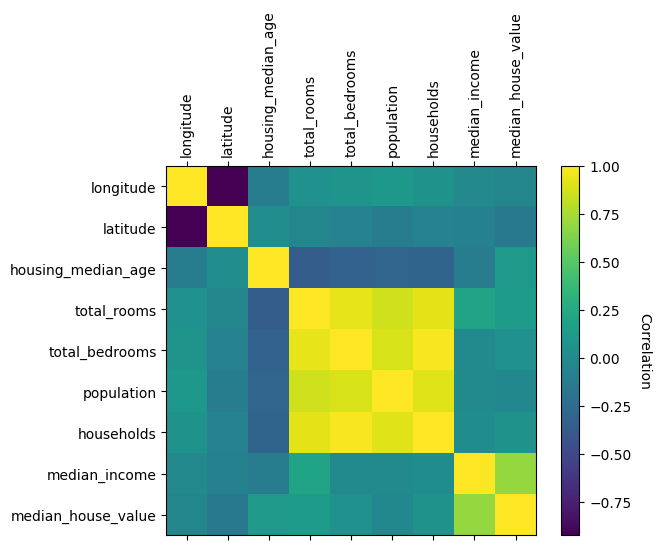

In [125]:
#testing correlations
plot_df_corr(training_df)

learning rate: 0.01 epochs: 10 batch size: 256
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 2ms/step


2023-02-15 20:35:34.493171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


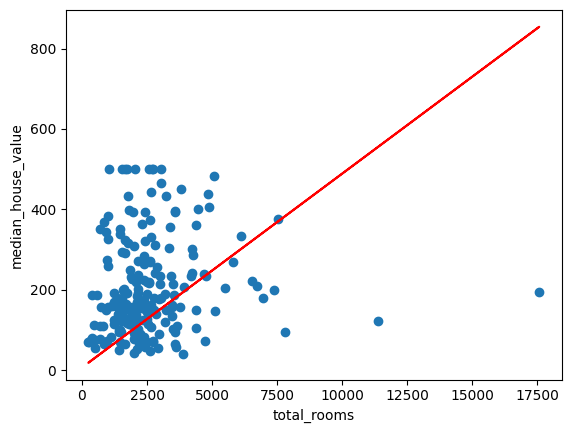

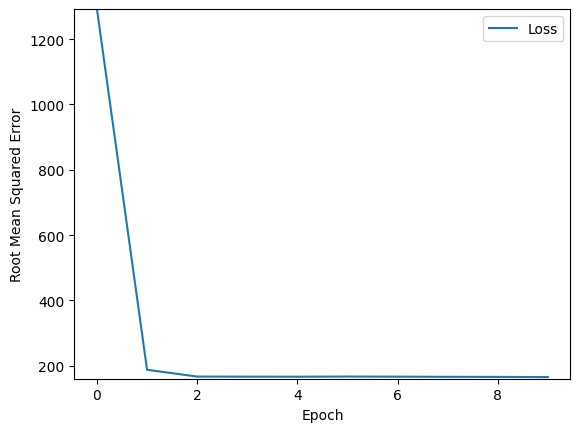

In [119]:
print("learning rate:", learning_rate, "epochs:", epoch_count, "batch size:", batch_size)

sample_df = training_df.sample(n=200, ignore_index=True)
features = sample_df[my_feature]
predictions = my_model.predict(features).ravel()
sample_df["predictions"] = predictions


plot_the_model(sample_df, feature=my_feature, label=my_label)
plot_the_loss_curve(epochs, rmse)